In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../task2/Stock Prices Data Set.csv')
df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


### Compute summary statistics (mean, median, variance,etc.).

In [3]:
df.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


### Visualize the data using histograms, scatter plots, and box plots.

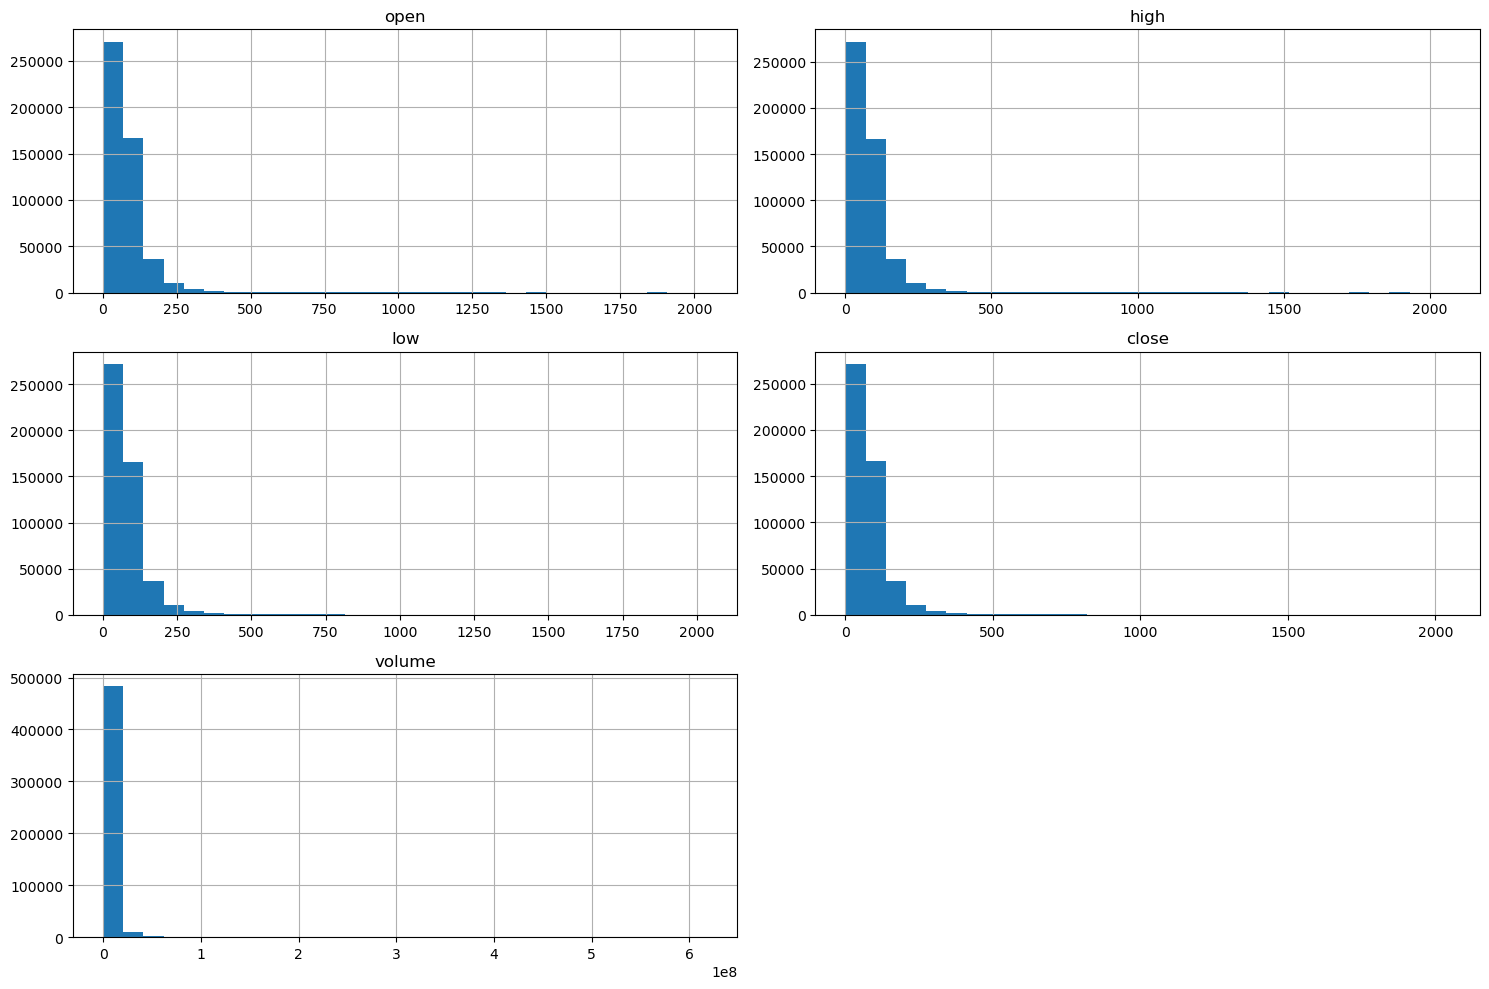

In [6]:
numerical_columns = ['open', 'high', 'low', 'close', 'volume']
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

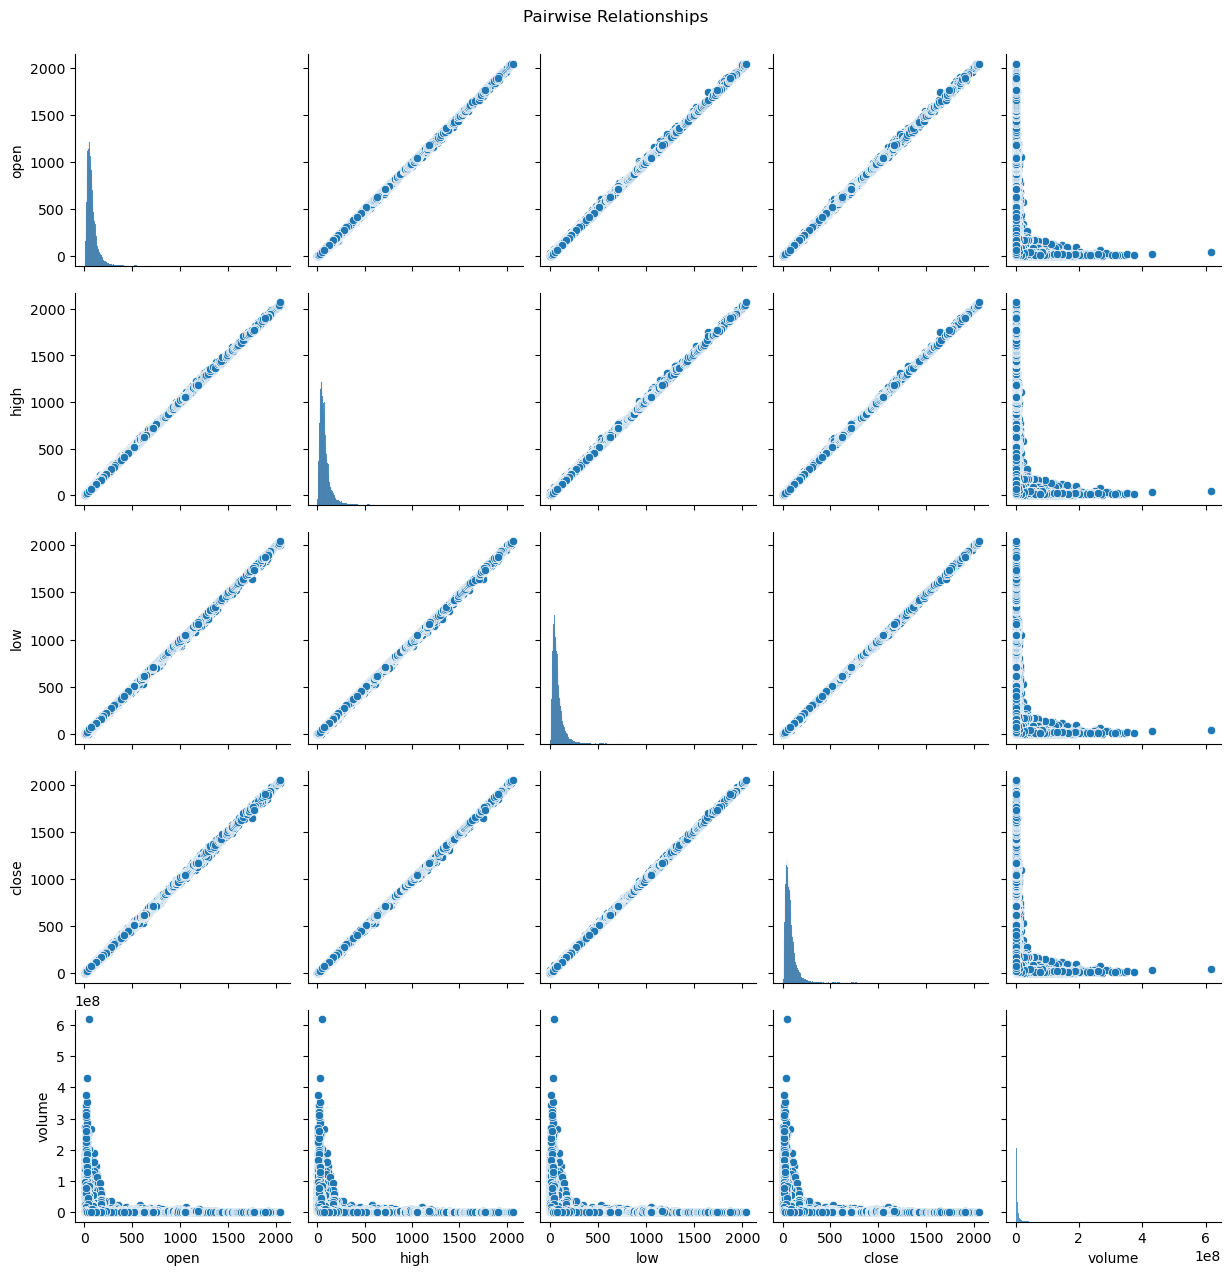

In [13]:
# Pair plot for multiple relationships
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

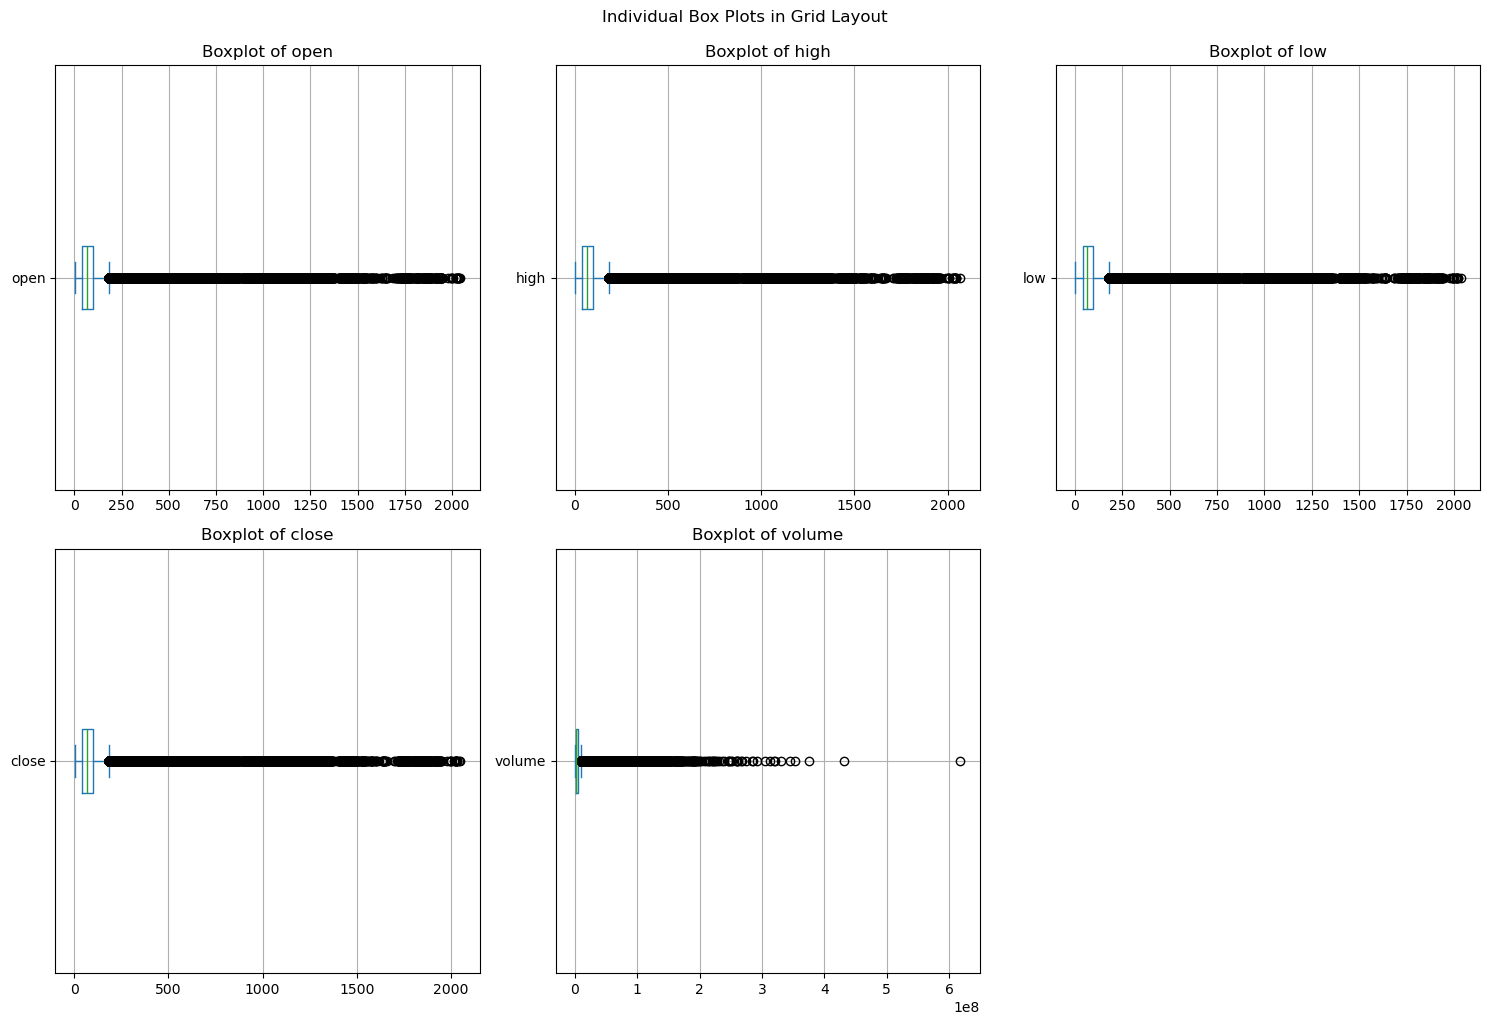

In [19]:
import matplotlib.pyplot as plt

# Create a 2x3 grid (adjust as needed)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each numerical column in its own subplot
for i, col in enumerate(numerical_columns):
    if i < len(axes):  # Ensure we don't exceed grid size
        df[col].plot(kind='box', ax=axes[i], vert=False)
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].grid(True)

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Individual Box Plots in Grid Layout', y=1.02)
plt.show()

### Identify correlations between numerical features using a correlation matrix.

In [18]:
# correlation
df.select_dtypes(include="number").corr()

,open,high,low,close,volume
open,1.000000,0.999941,0.999928,0.999876,-0.148724
high,0.999941,1.000000,0.999905,0.999938,-0.148344
low,0.999928,0.999905,1.000000,0.999941,-0.149284
close,0.999876,0.999938,0.999941,1.000000,-0.148839
volume,-0.148724,-0.148344,-0.149284,-0.148839,1.000000


### Generate a report summarizing insights from the EDA.



### 1. Outlier Distribution
- **All price columns** (`open`, `high`, `low`, `close`) show:
  ✓ Significant outlier presence  
  ✓ Similar outlier patterns
- **Volume column** displays:
  ✓ Different outlier characteristics  
  ✓ Less extreme values compared to price columns

### 2. Correlation Patterns
| Relationship Type        | Columns Involved               | Strength |
|--------------------------|--------------------------------|----------|
| Strong Positive          | open ↔ high ↔ low ↔ close      | 0.95+    |
| Weak/No Correlation      | volume ↔ price columns         | < 0.3    |
